C:\Users\mojum\AppData\Local\Temp\ipykernel_31460\1029348689.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = np.array(Image.fromarray(img).resize(target_size, Image.ANTIALIAS))


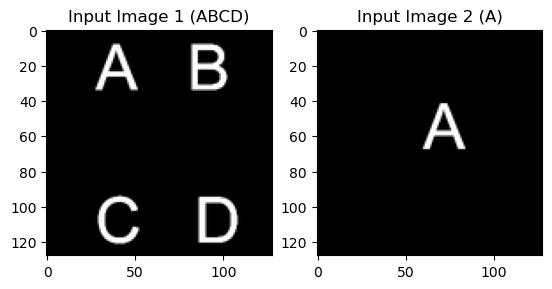

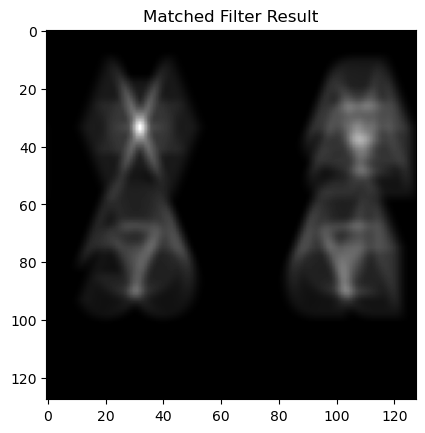

Highest peak intensity: 200078475264.0
Coordinates of highest peak (x, y): (33, 32)


C:\Users\mojum\AppData\Local\Temp\ipykernel_31460\1029348689.py:16: RuntimeWarning: invalid value encountered in cast
  img = Image.fromarray(image_array.astype(np.uint8))


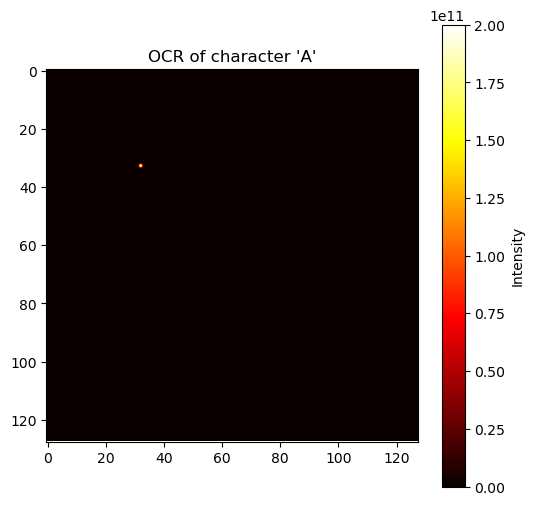

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2
from PIL import Image

# Function to load and resize the raw image to 128x128
def load_and_resize_raw_image(filepath, target_size=(128, 128)):
    with open(filepath, 'rb') as file:
        img = np.fromfile(file, dtype=np.uint8)
    img = img.reshape((256, 256))  # Initial size is 256x256
    resized_img = np.array(Image.fromarray(img).resize(target_size, Image.ANTIALIAS))
    return resized_img

# Function to save images as .jpg
def save_image_as_jpg(image_array, filepath):
    img = Image.fromarray(image_array.astype(np.uint8))
    img.save(filepath)

# Load both images
image_1_path = r'C:\Users\mojum\Python_programs\Obj-ABCD-256.raw'
image_2_path = r'C:\Users\mojum\Python_programs\Object-A-256.raw'

image_1 = load_and_resize_raw_image(image_1_path, target_size=(128, 128))  # Image containing 'ABCD'
image_2 = load_and_resize_raw_image(image_2_path, target_size=(128, 128))  # Image containing 'A'

# Display input images
plt.subplot(1, 2, 1)
plt.imshow(image_1, cmap='gray')
plt.title('Input Image 1 (ABCD)')
plt.subplot(1, 2, 2)
plt.imshow(image_2, cmap='gray')
plt.title('Input Image 2 (A)')
plt.show()

# Save the input images as jpg
save_image_as_jpg(image_1, r'C:\Users\mojum\Python_programs\Obj-ABCD-128.jpg')
save_image_as_jpg(image_2, r'C:\Users\mojum\Python_programs\Object-A-128.jpg')

# Perform Fast Fourier Transform (FFT) on both images
fft_image_1 = fft2(image_1)
fft_image_2 = fft2(image_2)

# Compute the complex conjugate of the FFT of image_2
fft_image_2_conj = np.conjugate(fft_image_2)

# Multiply the FFT of image_1 by the complex conjugate of the FFT of image_2
result = fft_image_1 * fft_image_2_conj

# Perform the inverse FFT to get the result image
result_image = np.abs(fft2(result))

# Display the result image
plt.imshow(result_image, cmap='gray')
plt.title("Matched Filter Result")
plt.show()

# Save the result image as jpg
save_image_as_jpg(result_image, r'C:\Users\mojum\Python_programs\matched_filter_result_128.jpg')

# Step 1: Find the coordinates of the highest peak in the result image
highest_peak_intensity = np.max(result_image)
highest_peak = np.unravel_index(np.argmax(result_image), result_image.shape)

# Print the x, y coordinates and the intensity value of the highest peak
print(f"Highest peak intensity: {highest_peak_intensity}")
print(f"Coordinates of highest peak (x, y): {highest_peak}")

# Step 2: Create a new image with all zeros, except for the highest peak
peak_only_image = np.zeros_like(result_image)
peak_only_image[highest_peak[0], highest_peak[1]] = highest_peak_intensity

# Display the image showing only the highest peak
plt.figure(figsize=(6, 6))
plt.imshow(peak_only_image, cmap='hot')
plt.colorbar(label='Intensity')
plt.title("OCR of character 'A'")
plt.show()

# Save the peak-only image
save_image_as_jpg(peak_only_image, r'C:\Users\mojum\Python_programs\matched_filter_highest_peak_128.jpg')


# Get all x, y coordinates and their corresponding magnitudes (intensity values)
x_values, y_values = np.meshgrid(np.arange(result_image.shape[0]), np.arange(result_image.shape[1]), indexing='ij')
x_flat = x_values.flatten()
y_flat = y_values.flatten()
magnitude_flat = result_image.flatten()

# Print out all (x, y) values along with their magnitudes
#for x, y, magnitude in zip(x_flat, y_flat, magnitude_flat):
#    print(f"x: {x}, y: {y}, magnitude: {magnitude}")



Cluster 1 (Top-left): Peak at (33, 32), Intensity: 200078475264.0
Cluster 2 (Top-right): Peak at (38, 108), Intensity: 140079546368.0
Cluster 3 (Bottom-left): Peak at (90, 31), Intensity: 85115977728.0
Cluster 4 (Bottom-right): Peak at (89, 103), Intensity: 101154209792.0


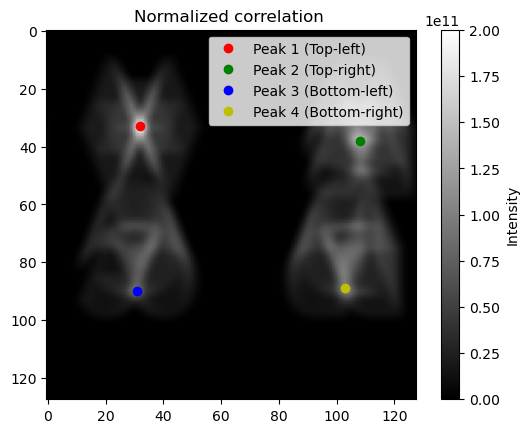

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `result_image` has been computed and is available

# Get the dimensions of the result image (assumed to be 128x128)
height, width = result_image.shape

# We will divide the image into four quadrants (clusters)
cluster_height = height // 2
cluster_width = width // 2

# Function to find the highest peak in a specific region of the image
def find_highest_peak_in_cluster(image, x_start, x_end, y_start, y_end):
    cluster_region = image[x_start:x_end, y_start:y_end]
    highest_peak_intensity = np.max(cluster_region)
    highest_peak_local = np.unravel_index(np.argmax(cluster_region), cluster_region.shape)
    highest_peak_global = (highest_peak_local[0] + x_start, highest_peak_local[1] + y_start)
    return highest_peak_global, highest_peak_intensity

# Cluster 1: Top-left (first letter)
peak_1, intensity_1 = find_highest_peak_in_cluster(result_image, 0, cluster_height, 0, cluster_width)

# Cluster 2: Top-right (second letter)
peak_2, intensity_2 = find_highest_peak_in_cluster(result_image, 0, cluster_height, cluster_width, width)

# Cluster 3: Bottom-left (third letter)
peak_3, intensity_3 = find_highest_peak_in_cluster(result_image, cluster_height, height, 0, cluster_width)

# Cluster 4: Bottom-right (fourth letter)
peak_4, intensity_4 = find_highest_peak_in_cluster(result_image, cluster_height, height, cluster_width, width)

# Print the highest peaks and their positions for each cluster
print(f"Cluster 1 (Top-left): Peak at {peak_1}, Intensity: {intensity_1}")
print(f"Cluster 2 (Top-right): Peak at {peak_2}, Intensity: {intensity_2}")
print(f"Cluster 3 (Bottom-left): Peak at {peak_3}, Intensity: {intensity_3}")
print(f"Cluster 4 (Bottom-right): Peak at {peak_4}, Intensity: {intensity_4}")

# Optional: Plot the result image with markers on the peak positions
plt.imshow(result_image, cmap='gray')
plt.colorbar(label='Intensity')

# Plot markers for each peak
plt.plot(peak_1[1], peak_1[0], 'ro', label='Peak 1 (Top-left)')
plt.plot(peak_2[1], peak_2[0], 'go', label='Peak 2 (Top-right)')
plt.plot(peak_3[1], peak_3[0], 'bo', label='Peak 3 (Bottom-left)')
plt.plot(peak_4[1], peak_4[0], 'yo', label='Peak 4 (Bottom-right)')

plt.legend()
plt.title("Normalized correlation ")
plt.show()
